# Fourier Components

> Generate fourier components for fourier seasonality

In [ ]:
#| default_exp model_helpers.fourier

In [ ]:
#| hide
from nbdev.showdoc import *
import warnings
from tueplots import bundles
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

In [ ]:
#| export
import pandas as pd
import numpy as np

In [ ]:
#| hide
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
#| hide
plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({'figure.dpi': 300})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [ ]:
#| export
def generate_fourier_components(
  N_samples: int, # Number of samples
  N_components: int = 3, # Half the number of Fourier components
  period: int = 52 # Yearly period of weekly data
) -> pd.DataFrame: # Dataframe with fourier components
    "Generate Fourier components for a given number of samples and components."
    t = np.linspace(0, N_samples, N_samples)
    fourier_components = pd.DataFrame()
    for i in range(N_components):
        fourier_components[f'fourier_sin_{i}'] = np.sin(2 * np.pi * (i + 1) * t / period)
    for i in range(N_components):
        fourier_components[f'fourier_cos_{i}'] = np.cos(2 * np.pi * (i + 1) * t / period)
    return fourier_components
  

In [ ]:
period = pd.date_range("2021-01-01", periods=156, freq="W-MON")
fourier_components = generate_fourier_components(period.shape[0], 3, 52)
fourier_components.head()

,fourier_sin_0,fourier_sin_1,fourier_sin_2,fourier_cos_0,fourier_cos_1,fourier_cos_2
0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
1,0.121311,0.240829,0.356791,0.992615,0.970568,0.934184
2,0.240829,0.467482,0.666616,0.970568,0.884003,0.745401
3,0.356791,0.666616,0.888695,0.934184,0.745401,0.458499
4,0.467482,0.826511,0.993793,0.884003,0.562921,0.111245


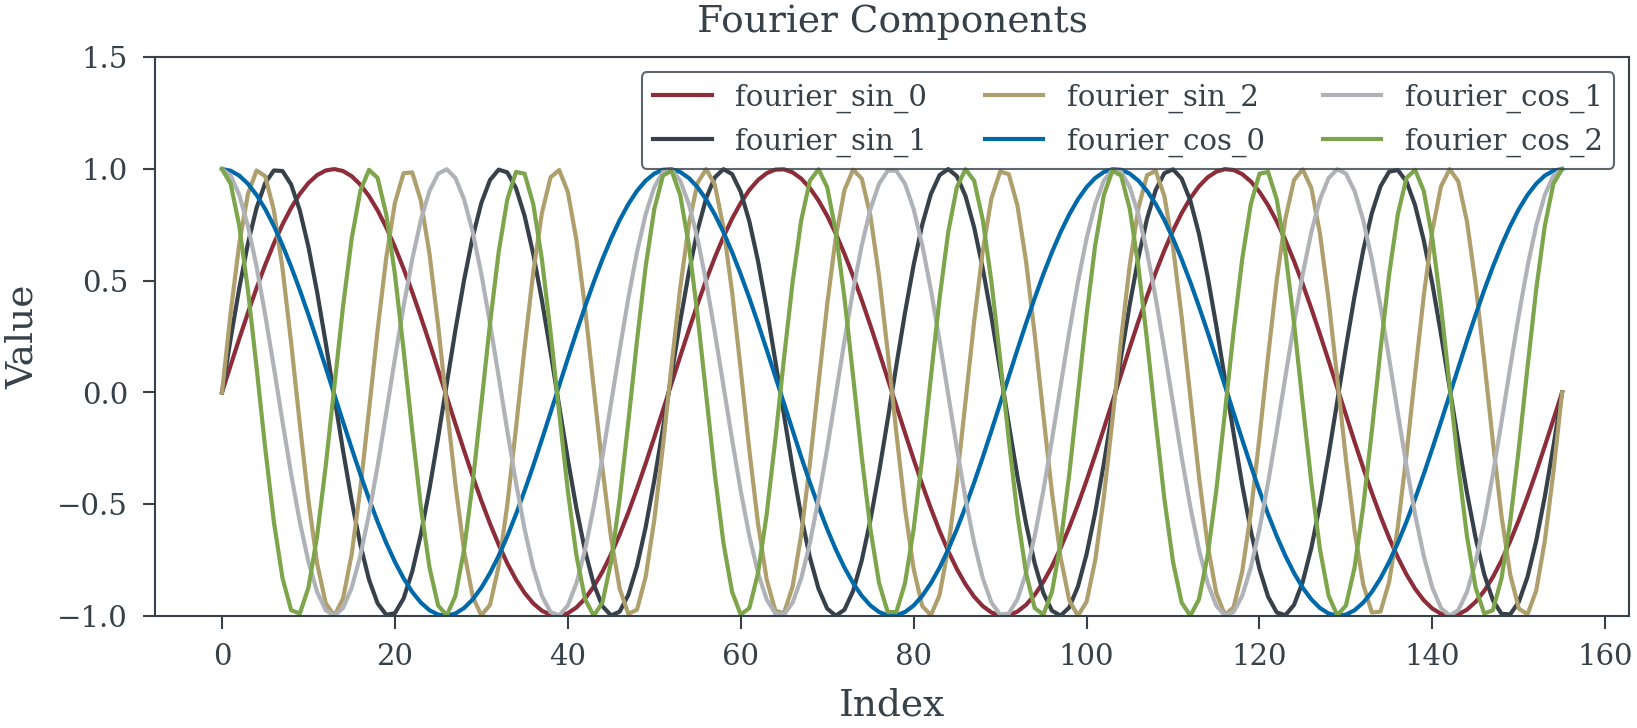

In [ ]:
#| echo: false
#| label: fig-sample-fc
#| fig-cap: Fourier components.
fourier_components.plot()
plt.legend(ncols=3)
plt.ylim(-1, 1.5)
plt.title("Fourier Components")
plt.ylabel("Value")
plt.xlabel("Index");

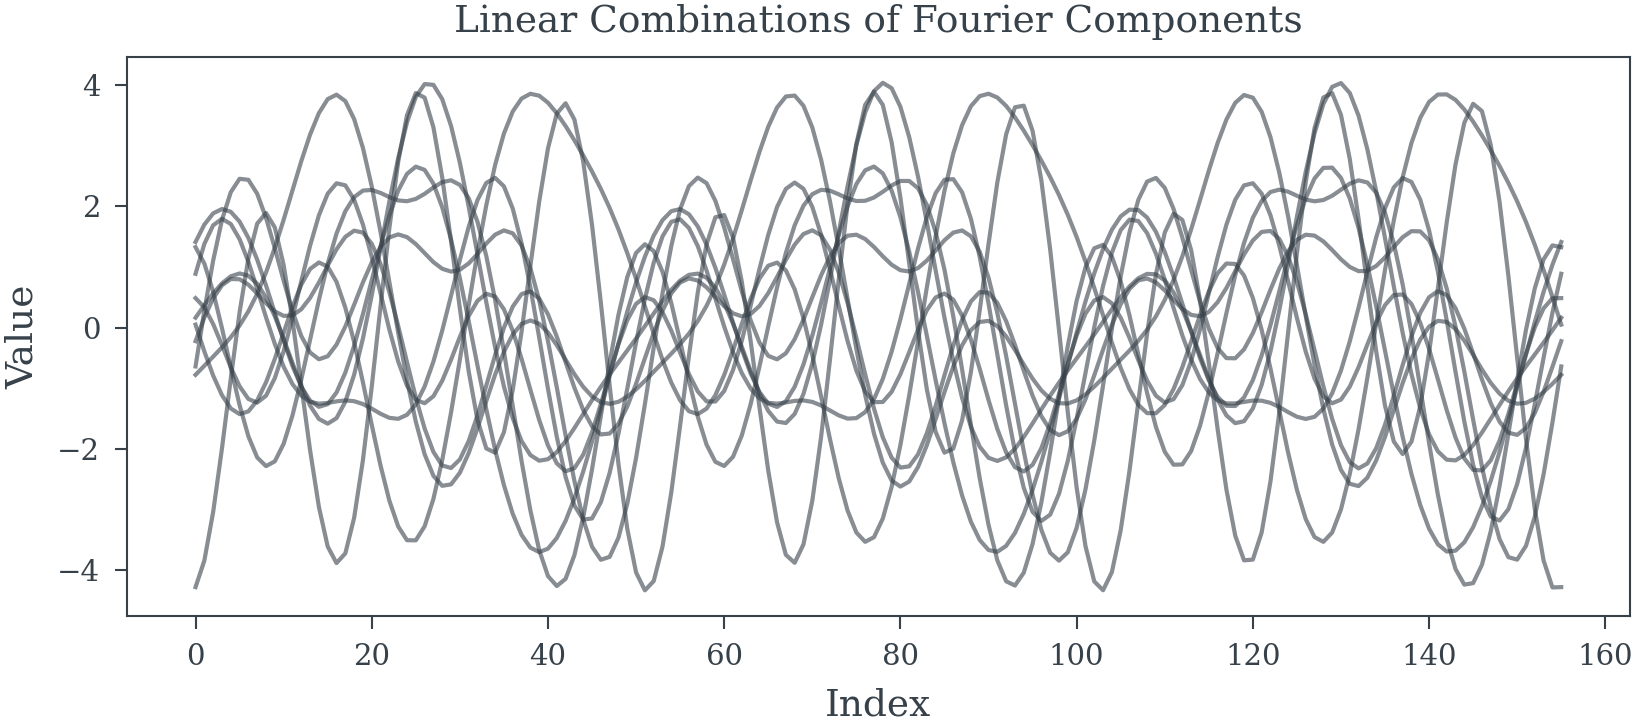

In [ ]:
#| echo: false
#| label: fig-sample-lc-fc
#| fig-cap: Samples of linear combination of fourier components.
plt.plot((
    fourier_components.values
    @ (np.random.normal(
        0, 
        1, 
        size=(fourier_components.values.shape[1], 10)))
    ) + np.random.normal(0, .2, size=10),
    c='C1', 
    alpha=0.6)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Linear Combinations of Fourier Components");

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()